In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [8]:
file_path=r"C:\Users\Vishakha\Downloads\Mall_Customers.csv"
data = pd.read_csv(file_path)

In [9]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


In [11]:
gender_counts = data['Gender'].value_counts()
print("\nCount of customers by gender:")
print(gender_counts)


Count of customers by gender:
Gender
Female    137
Male      113
Name: count, dtype: int64


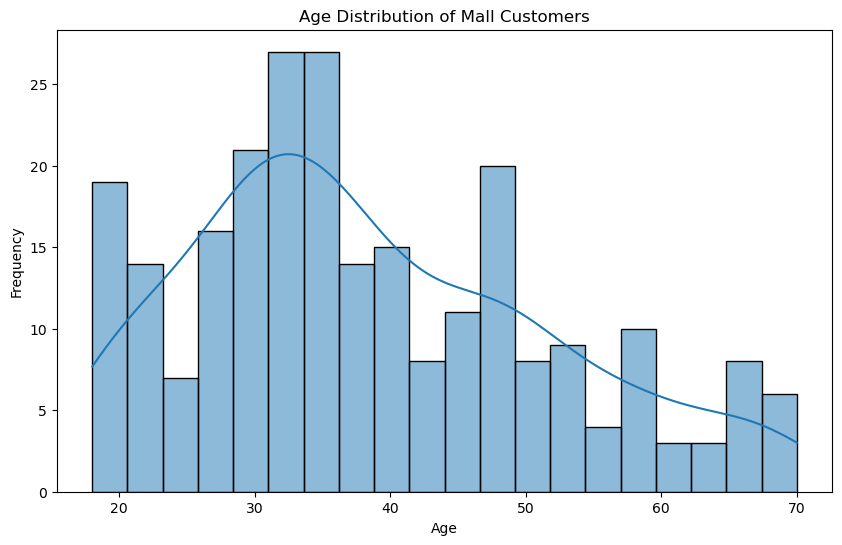

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

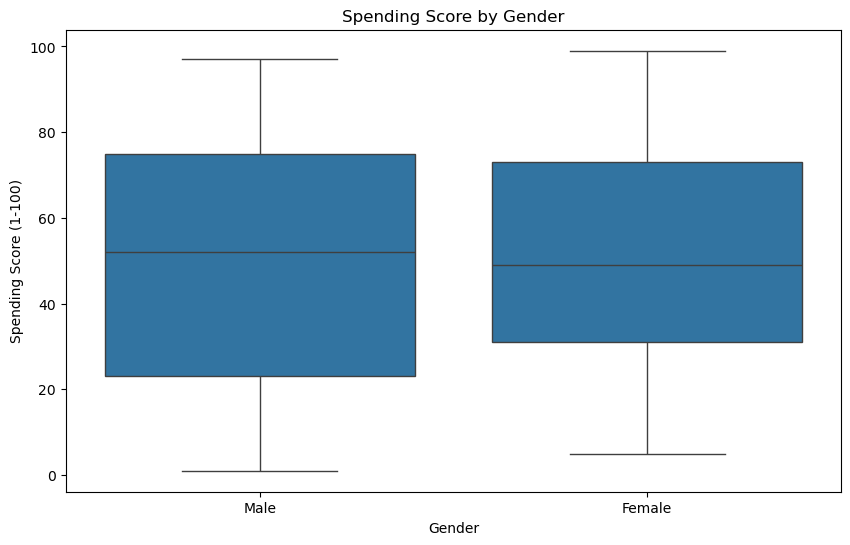

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [14]:
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [16]:
# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)


In [17]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters


In [18]:
# Display the number of clusters found
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Number of clusters found: {num_clusters}")


Number of clusters found: 1


In [19]:
# Evaluate the model using silhouette score
if num_clusters > 1:  # Silhouette score is not defined for a single cluster
    silhouette_avg = silhouette_score(scaled_features, clusters)
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Silhouette Score: Not applicable (only one cluster found)")


Silhouette Score: Not applicable (only one cluster found)


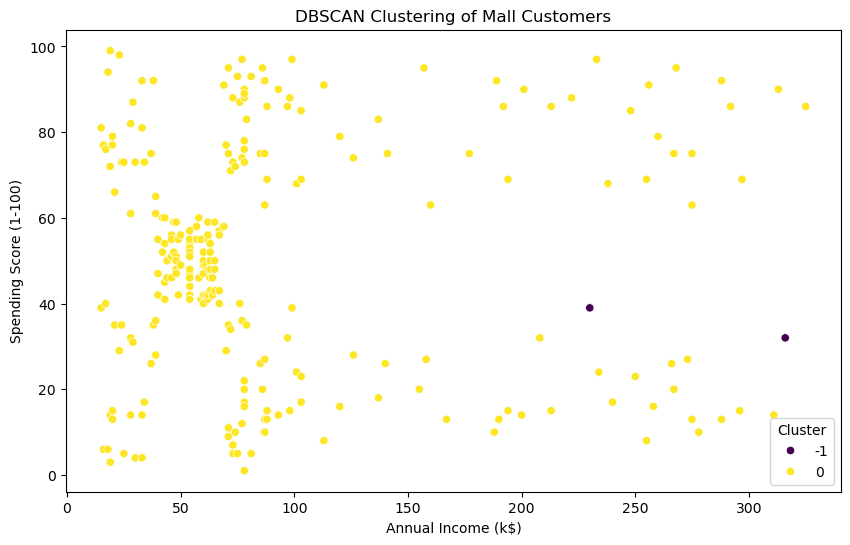

In [20]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', legend='full')
plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()